In [1]:
'''
Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.
'''
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
random.seed(1)

# Creating Dataset

In [2]:
dsa = [random.randint(0,100) for i in range(2500)]
cn = [random.randint(0,100) for i in range(2500)]
os = [random.randint(0,100) for i in range(2500)]
oop = [random.randint(0,100) for i in range(2500)]
dbms = [random.randint(0,100) for i in range(2500)]

for i in range(500):
    r = random.randint(101,250)
    dsa.append(r)
    r = random.randint(101,250)
    cn.append(r)
    r = random.randint(101,250)
    os.append(r)
    r = random.randint(101,250)
    oop.append(r)
    r = random.randint(101,250)
    dbms.append(r)

g = ['M','F']
gender = [g[random.randint(0,1)] for i in range(3000)]

div = ['TE-1','TE-2','TE-3','TE-4']
Class = [div[random.randint(0,3)] for i in range(3000)]

for i in range(100):
    r = random.randint(0,2999)
    dsa[r] = np.nan
    r = random.randint(0,2999)
    cn[r] = np.nan
    r = random.randint(0,2999)
    oop[r] = np.nan
    r = random.randint(0,2999)
    os[r] = np.nan
    r = random.randint(0,2999)
    dbms[r] = np.nan

data = {"class":Class,"gender": gender,"dsa":dsa,"os":os,"cn":cn,"dbms":dbms,"oop":oop}
df = pd.DataFrame(data)
df.sample(frac =1).reset_index(drop=1)

,class,gender,dsa,os,cn,dbms,oop
0,TE-1,F,51.0,25.0,79.0,34.0,86.0
1,TE-2,M,212.0,214.0,177.0,199.0,155.0
2,TE-3,M,68.0,52.0,17.0,21.0,93.0
3,TE-4,F,67.0,86.0,48.0,59.0,70.0
4,TE-4,M,98.0,42.0,8.0,81.0,100.0
...,...,...,...,...,...,...,...
2995,TE-4,M,67.0,19.0,47.0,8.0,16.0
2996,TE-3,M,23.0,15.0,9.0,65.0,NaN
2997,TE-3,F,87.0,81.0,64.0,59.0,95.0
2998,TE-3,M,148.0,241.0,169.0,234.0,111.0


In [3]:
df.describe()


,dsa,os,cn,dbms,oop
count,2900.000000,2903.000000,2902.000000,2901.000000,2901.000000
mean,71.122759,70.158112,70.355272,70.444674,70.846949
std,55.850872,56.133383,56.523367,55.518864,55.485071
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,29.000000,29.250000,29.000000,30.000000
50%,62.000000,58.000000,59.000000,60.000000,61.000000
75%,91.000000,90.000000,90.000000,91.000000,90.000000
max,250.000000,250.000000,250.000000,250.000000,250.000000


In [4]:
df.skew()

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_34828/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


dsa     1.288427
os      1.327150
cn      1.325988
dbms    1.254050
oop     1.277132
dtype: float64

<AxesSubplot:>

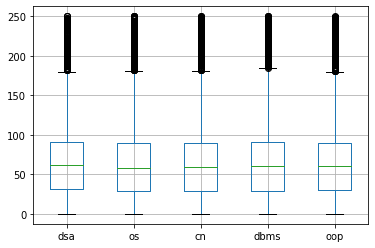

In [5]:

# df.skew()

df.boxplot()


# plt.plot(df.dsa, norm.pdf(df.dsa, df.dsa.mean(), df.dsa.std()))
# plt.show()

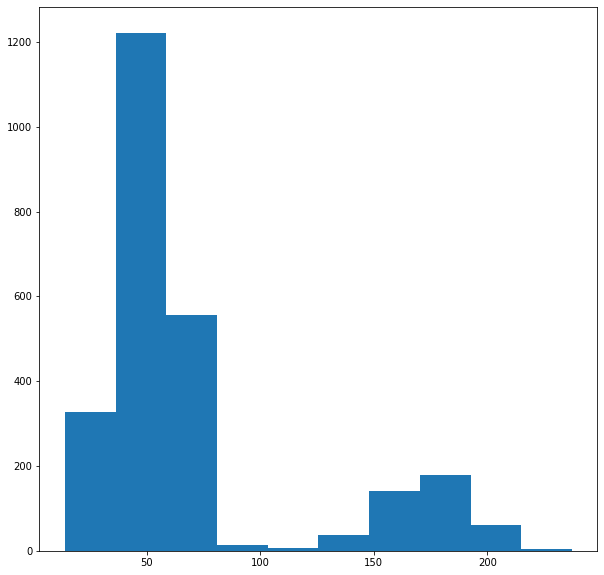

In [6]:
df["percentage"] = df["oop"]+df["os"]+df["dsa"]+df["cn"]+df["dbms"]
df["percentage"] = df["percentage"]/5

plt.figure(figsize=(10,10))
plt.hist(df.percentage)
plt.show()

In [7]:
for col in df.select_dtypes(include = "number"):
    outliers = df[df[col] > 100].index
    df.drop(outliers,inplace = True)

df.isnull().sum()
for col in df.select_dtypes(include = "number"):
    df[col].fillna(df[col].mean(),inplace = True)

df["percentage"] = df["oop"]+df["os"]+df["dsa"]+df["cn"]+df["dbms"]
df["percentage"] = df["percentage"]/5

df.describe()
df.skew()

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_34828/1262594857.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


dsa          -0.029864
os            0.040753
cn            0.023661
dbms          0.001120
oop          -0.034010
percentage    0.043580
dtype: float64

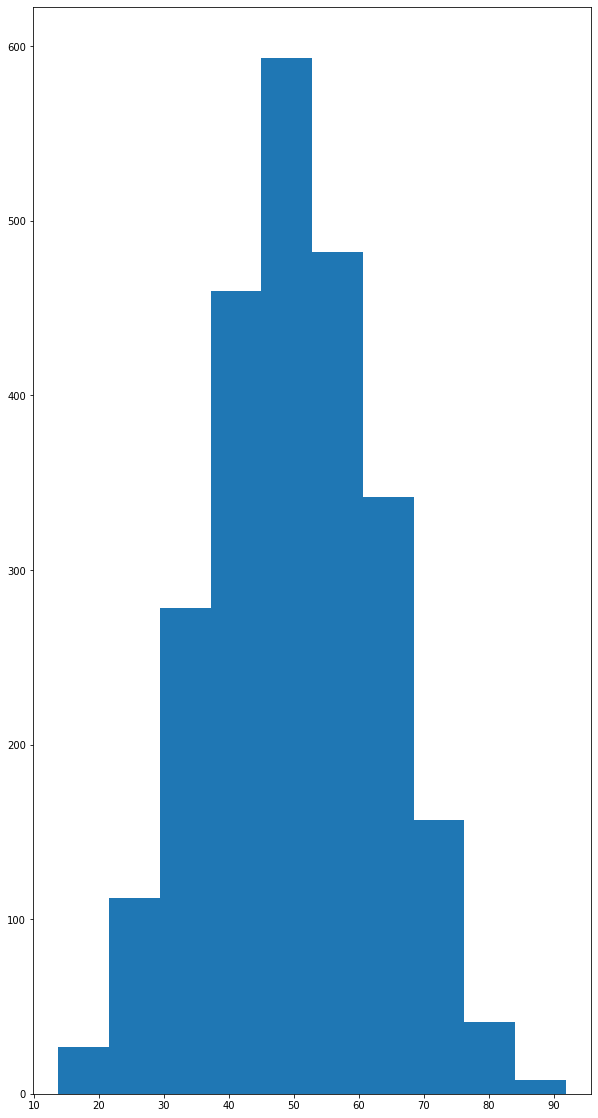

In [8]:
# df.boxplot()
plt.figure(figsize=(10,20))
plt.hist(df.percentage)
plt.show()



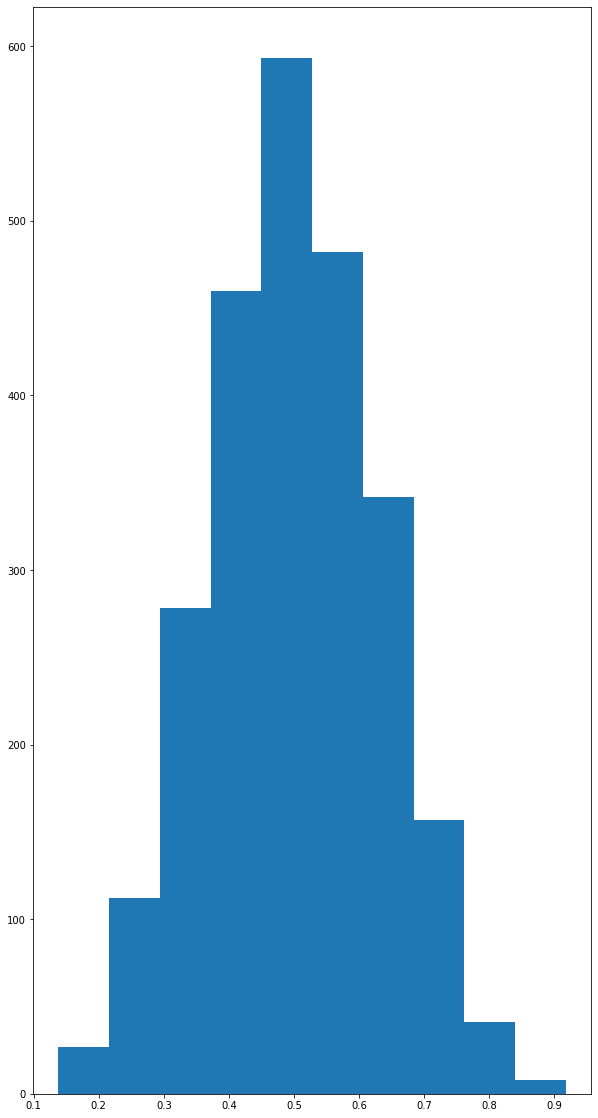

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numeric = df.select_dtypes(include='number')
scaler.fit(df_numeric)
x_scaled = scaler.transform(df_numeric)
df[df_numeric.columns]  = x_scaled

df["percentage"] = df["oop"]+df["os"]+df["dsa"]+df["cn"]+df["dbms"]
df["percentage"] = df["percentage"]/5

plt.figure(figsize=(10,20))
plt.hist(df.percentage)
plt.show()
# plt.plot(df.dsa, norm.pdf(df.dsa, df.dsa.mean(), df.dsa.std()))
# plt.show()

In [10]:
df = pd.get_dummies(df, columns=["class",'gender'])
print(df)

       dsa    os    cn  dbms       oop  percentage  class_TE-1  class_TE-2  \
0     0.17  0.12  0.65  0.30  0.000000    0.248000           0           0   
1     0.72  0.32  0.56  0.57  0.830000    0.600000           0           0   
2     0.97  0.20  0.26  0.15  0.840000    0.484000           1           0   
3     0.08  0.76  0.89  0.08  0.800000    0.522000           0           0   
4     0.32  0.89  0.60  0.27  0.130000    0.442000           1           0   
...    ...   ...   ...   ...       ...         ...         ...         ...   
2495  1.00  0.08  0.38  0.98  0.506142    0.589228           0           1   
2496  0.58  0.48  0.00  0.62  0.510000    0.438000           0           0   
2497  0.58  0.97  0.93  1.00  0.340000    0.764000           0           0   
2498  0.45  0.32  0.48  0.59  0.530000    0.474000           0           0   
2499  0.29  1.00  0.43  0.76  0.950000    0.686000           1           0   

      class_TE-3  class_TE-4  gender_F  gender_M  
0           